In [41]:
import numpy as np 
import pandas as pd    

import torch
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim

from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader, random_split

import matplotlib.pyplot as plt
%matplotlib.inline


UsageError: Line magic function `%matplotlib.inline` not found.


In [58]:
class NeurlNet(nn.Module):
    def __init__(self):
        super().__init__()

        self.lay1 = nn.Linear(4,8)
        self.out = nn.Linear(8,3)

    def forward(self, x):
        x = F.relu(self.lay1(x))
        x = self.out(x)
        return x

In [59]:
torch.manual_seed(32)
model = NeurlNet()

In [60]:
iris_data = pd.read_csv('datasets/iris.csv')
iris_data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [61]:
iris_data['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [62]:
iris_data['variety'] = iris_data['variety'].replace("Setosa",0.0)
iris_data['variety'] = iris_data['variety'].replace("Versicolor",1.0)
iris_data['variety'] = iris_data['variety'].replace("Virginica",2.0)


In [63]:
iris_data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [64]:
featurs = iris_data.iloc[:,:-1].values
labels = iris_data.iloc[:,-1].values

In [65]:
# split data
x_train, x_test, y_train,y_test = train_test_split(featurs, labels, test_size=0.2, random_state=32)


In [77]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train).view(-1)
y_test = torch.FloatTensor(y_test).view(-1)

In [78]:
y_train.shape

torch.Size([120])

In [79]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)

In [81]:
# train
num_epochs = 100
losses = []
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output_batch = model.forward(x_train)
    loss = criterion(output_batch, y_train.type(torch.LongTensor))
    loss.backward()
    optimizer.step()
    losses.append(loss.detach().numpy())
    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')



Epoch [1/100], Loss: 1.1633
Epoch [11/100], Loss: 0.8488
Epoch [21/100], Loss: 0.6763
Epoch [31/100], Loss: 0.5421
Epoch [41/100], Loss: 0.4411
Epoch [51/100], Loss: 0.3626
Epoch [61/100], Loss: 0.2969
Epoch [71/100], Loss: 0.2416
Epoch [81/100], Loss: 0.1977
Epoch [91/100], Loss: 0.1648


Text(0.5, 0, 'epochs')

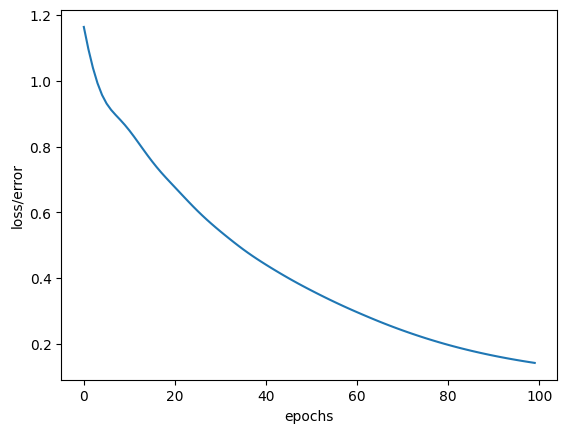

In [82]:


plt.plot(range(num_epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("epochs")


In [83]:
with torch.no_grad(): # turn off back propagation
    model.eval()
    y_ped_eval = model(x_test)
    loss = criterion(y_ped_eval, y_test.type(torch.LongTensor))

loss

tensor(0.1365)

In [89]:
 y_test.squeeze()

tensor([1., 0., 0., 1., 2., 2., 0., 0., 1., 0., 1., 2., 1., 1., 2., 2., 1., 2.,
        1., 0., 0., 2., 2., 0., 0., 1., 0., 2., 0., 0.])

In [92]:
model.eval()  # Set model to evaluation mode

with torch.no_grad():
    output_test = model(x_test)
    predicted_labels = output_test.argmax(dim=1)

correct_predictions = (predicted_labels == y_test.squeeze()).sum().item()
print(correct_predictions)
total_predictions = len(y_test)

accuracy = correct_predictions / total_predictions
print(f"Accuracy on test set: {accuracy:.4f}")


30
Accuracy on test set: 1.0000


In [105]:
model.eval()
correct = 0
all_ = len(y_test)

with torch.no_grad():
    for i, data in enumerate(x_test):
        pred = model(data)
        prediction_best = pred.argmax(dim=-1)
        print(f'{pred}  {prediction_best }  {y_test[i].type(torch.int)}')
        if prediction_best == y_test[i]:
            correct += 1
    
    print(f'Accuracy of the model is: {round((correct / all_)* 100)}%')


tensor([-1.7754,  2.2511,  1.0855])  1  1
tensor([ 5.0900,  0.3369, -9.3457])  0  0
tensor([ 4.2231,  0.8891, -8.1976])  0  0
tensor([-1.8695,  2.4113,  1.0194])  1  1
tensor([-2.8221,  1.8163,  3.3331])  2  2
tensor([-3.1500,  2.3788,  3.1325])  2  2
tensor([ 3.7972,  1.0610, -7.6338])  0  0
tensor([ 4.2668,  1.0327, -8.4191])  0  0
tensor([-1.6253,  2.2586,  0.7910])  1  1
tensor([ 4.7767,  0.6649, -8.9761])  0  0
tensor([-2.0099,  2.7778,  0.7827])  1  1
tensor([-3.0750,  1.5617,  3.9739])  2  2
tensor([-1.2427,  2.3969,  0.0233])  1  1
tensor([-1.0526,  2.5489, -0.5310])  1  1
tensor([-2.8156,  1.8950,  3.1553])  2  2
tensor([-3.0320,  1.3521,  4.1565])  2  2
tensor([-1.8587,  2.0543,  1.4556])  1  1
tensor([-2.5838,  2.0249,  2.6214])  2  2
tensor([-1.2777,  2.5859, -0.1581])  1  1
tensor([ 5.1120,  0.7765, -9.7729])  0  0
tensor([ 4.3887,  0.6771, -8.2552])  0  0
tensor([-3.4735,  2.0065,  4.1171])  2  2
tensor([-2.3511,  1.9254,  2.3837])  2  2
tensor([ 4.4147,  1.0267, -8.6669]